<a href="https://colab.research.google.com/github/nadinne94/projeto_forbes_2023/blob/main/Global2000_forbes2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [1]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

## Carregando os dados

In [2]:
# Carregar os dados de um arquivo CSV
df_forbes = pd.read_csv('forbes2023.csv')
df_forbes

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,Banking and Financial Service,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,Banking and Financial Service,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,Banking and Financial Service,186.14 B,37.92 B,"5,356.86 B",141.82 B
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.35 B,489.5 M,7.82 B,15.6 B
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.62 B,-202 M,11.39 B,3.17 B
1997,1998,Yes Bank,India,Banking and Financial Service,3.34 B,91.6 M,43.22 B,5.6 B
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,556 M,167.1 M,42.97 B,2.49 B


## Análise Exploratória

In [3]:
# exibindo a forma do dataframe
df_forbes.shape

(2000, 8)

In [4]:
# Exibindo as colunas do DataFrame
df_forbes.columns

Index(['rank', 'name', 'country', 'industry', 'sales', 'profit', 'assets',
       'market_value'],
      dtype='object')

In [5]:
# Exibindo os tipos de dados de cada coluna
df_forbes.dtypes

rank             int64
name            object
country         object
industry        object
sales           object
profit          object
assets          object
market_value    object
dtype: object

In [6]:
# Verificar valores ausentes em cada coluna
df_forbes.isnull().sum()

rank            0
name            0
country         0
industry        0
sales           0
profit          0
assets          0
market_value    0
dtype: int64

 * Resumo do DataFrame:

 O método info() retorna um resumo com as informações do DF, podendo subsitituir os atributos shape, columns, dtypes, e o método isnull(). Agrupando essas informações em um único bloco.

In [7]:
# Exibindo resumo das informações do DataFrame
df_forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          2000 non-null   int64 
 1   name          2000 non-null   object
 2   country       2000 non-null   object
 3   industry      2000 non-null   object
 4   sales         2000 non-null   object
 5   profit        2000 non-null   object
 6   assets        2000 non-null   object
 7   market_value  2000 non-null   object
dtypes: int64(1), object(7)
memory usage: 125.1+ KB


In [8]:
# Verificar se há dados duplicados no DataFrame
df_forbes.duplicated().sum()

0

In [9]:
# visualizando as 10 primeiras linhas
df_forbes.head(10)

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,Banking and Financial Service,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,Banking and Financial Service,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,Banking and Financial Service,186.14 B,37.92 B,"5,356.86 B",141.82 B
5,6,Bank of America,United States,Banking and Financial Service,133.84 B,28.62 B,"3,194.66 B",220.82 B
6,7,Alphabet,United States,"IT, Internet, Software and Services",282.85 B,58.59 B,369.49 B,"1,340.53 B"
7,8,ExxonMobil,United States,"Oil, Gas, Mining, Materials and Chemicals",393.16 B,61.69 B,369.37 B,439.39 B
8,9,Microsoft,United States,"IT, Internet, Software and Services",207.59 B,69.02 B,380.09 B,"2,309.84 B"
9,10,Apple,United States,"Engineer, Manufacturing and Construction",385.1 B,94.32 B,332.16 B,"2,746.21 B"


In [10]:
# Exibindo as 10 últimas linhas do df
df_forbes.tail(10)

,rank,name,country,industry,sales,profit,assets,market_value
1990,1991,China Merchants Port Group,China,Transportation and Logistics,2.28 B,485.4 M,28.9 B,7.51 B
1991,1992,iflytek,China,"IT, Internet, Software and Services",2.64 B,57.3 M,4.62 B,19.6 B
1992,1993,Polaris Inc.,United States,"Engineer, Manufacturing and Construction",8.99 B,633.2 M,5.29 B,5.99 B
1993,1994,Yango Group,China,Banking and Financial Service,5.56 B,-1.68 B,43.48 B,785 M
1994,1995,Kangmei Pharmaceutical,China,Drugs and Biotechnology,484 M,1.23 B,2.19 B,4.62 B
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.35 B,489.5 M,7.82 B,15.6 B
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.62 B,-202 M,11.39 B,3.17 B
1997,1998,Yes Bank,India,Banking and Financial Service,3.34 B,91.6 M,43.22 B,5.6 B
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,556 M,167.1 M,42.97 B,2.49 B
1999,2000,Ipsen,France,Drugs and Biotechnology,3.18 B,681.7 M,5.99 B,10.21 B


obs.: Pode-se observar nas colunas "sales", "profit" e "market_value" irregularidade nos valores, o que indica que será preciso normalizar as colunas




## Tratamento dos Dados

* Transformar as 4 últimas colunas: object -> númerico
* A letra "M" indica que os valores estão em "milhões" e demais valores estão em "bilhões"
* Uniformizar os dados em "bilhões"

In [11]:
# Verifica se as colunas sales, profit, assets e market_value contêm 'M' ou 'B'
m_counts = df_forbes[['sales', 'profit', 'assets', 'market_value']].apply(lambda x: x.str.contains('M', regex=True)).sum().sum()
b_counts = df_forbes[['sales', 'profit', 'assets', 'market_value']].apply(lambda x: x.str.contains('B', regex=True)).sum().sum()

In [12]:
print("Total de valores em milhão (M):", m_counts)
print("Total de valores em bilhão (B):", b_counts)

Total de valores em milhão (M): 1047
Total de valores em bilhão (B): 6953


### Converter valores

In [13]:
def convert_value(value):

    # Converte o valor para a escala de bilhões de dólares, removendo vírgulas dos valores em milhares de bilhões.
    # Args: value (str): O valor a ser convertido, representado como uma string.
    # Returns: float: O valor convertido para bilhões de dólares.

    # Remover a vírgula dos valores de milhares de bilhões
    value = value.replace(',', '')

    # Se o valor estiver na escala de milhões, o valor retornado será convertido para bilhões
    if 'M' in value:
        return float(value.replace('M', '')) * 0.001

    # Caso contrário, retorna o próprio valor
    else:
        return float(value.replace('B', ''))


In [14]:
# lista das colunas a serem convertidas
cols_to_convert = ['sales', 'profit', 'assets', 'market_value']

# Loop sobre as colunas do especificadas do DataFrame
for col in cols_to_convert:
  df_forbes[col] = df_forbes[col].apply(convert_value)

In [15]:
df_forbes

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,179.930,41.8000,3744.30,399.59
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",589.470,156.3600,660.99,2055.22
2,3,ICBC,China,Banking and Financial Service,216.770,52.4700,6116.82,203.01
3,4,China Construction Bank,China,Banking and Financial Service,203.080,48.2500,4977.48,172.99
4,5,Agricultural Bank of China,China,Banking and Financial Service,186.140,37.9200,5356.86,141.82
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.350,0.4895,7.82,15.60
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.620,-0.2020,11.39,3.17
1997,1998,Yes Bank,India,Banking and Financial Service,3.340,0.0916,43.22,5.60
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,0.556,0.1671,42.97,2.49


In [16]:
df_forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          2000 non-null   int64  
 1   name          2000 non-null   object 
 2   country       2000 non-null   object 
 3   industry      2000 non-null   object 
 4   sales         2000 non-null   float64
 5   profit        2000 non-null   float64
 6   assets        2000 non-null   float64
 7   market_value  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


In [17]:
df_forbes = df_forbes.replace('Saudi Arabian Oil Company (Saudi Aramco)','Saudi Aramco')

In [18]:
df_forbes

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,179.930,41.8000,3744.30,399.59
1,2,Saudi Aramco,Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",589.470,156.3600,660.99,2055.22
2,3,ICBC,China,Banking and Financial Service,216.770,52.4700,6116.82,203.01
3,4,China Construction Bank,China,Banking and Financial Service,203.080,48.2500,4977.48,172.99
4,5,Agricultural Bank of China,China,Banking and Financial Service,186.140,37.9200,5356.86,141.82
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.350,0.4895,7.82,15.60
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.620,-0.2020,11.39,3.17
1997,1998,Yes Bank,India,Banking and Financial Service,3.340,0.0916,43.22,5.60
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,0.556,0.1671,42.97,2.49


## Análise de Tendência Central

#### describe()

In [ ]:
colunas_numericas = df_forbes[['sales', 'profit', 'assets', 'market_value']]

In [ ]:
# calcula estatísticas descritivas das variáveis numéricas
colunas_numericas.describe()

,sales,profit,assets,market_value
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,25.422386,2.208306,115.846347,36.995620
std,46.517169,6.632031,372.242230,114.230626
min,-109.990000,-76.170000,0.105000,0.032000
25%,5.770000,0.494850,14.720000,6.860000
50%,12.500000,0.961300,31.655000,15.310000
75%,25.170000,2.202500,76.972500,34.042500
max,611.290000,156.360000,6116.820000,2746.210000


#### Média, mediana e desvio padrão

In [ ]:
colunas_numericas.agg([np.mean, np.median, np.std])

,sales,profit,assets,market_value
mean,25.422386,2.208306,115.846347,36.995620
median,12.500000,0.961300,31.655000,15.310000
std,46.517169,6.632031,372.242230,114.230626


Sales, profit e market_value: pode haver alguns valores extremamente altos puxando a média para cima, indicando uma possível assimetria positiva

Assets: com base na diferença entre a média e a mediana, pode haver alguns valores extremamente altos ou baixos na distribuição dos ativos das empresas, o que está influenciando a média.


#### moda

Moda pode ser aplicada em todas as variáveis do dataframe

- utilizar a funcao df.mode()
- No caso vamos retirar as 2 primeiras colunas pois elas assumem valores unicos, sao identificadores

In [ ]:
df_forbes.iloc[:, 2:8].mode()

,country,industry,sales,profit,assets,market_value
0,United States,Banking and Financial Service,1.27,1.18,5.29,4.17
1,NaN,NaN,2.69,NaN,5.87,10.46
2,NaN,NaN,NaN,NaN,6.35,NaN
3,NaN,NaN,NaN,NaN,7.13,NaN
4,NaN,NaN,NaN,NaN,12.77,NaN
5,NaN,NaN,NaN,NaN,13.21,NaN
6,NaN,NaN,NaN,NaN,13.40,NaN
7,NaN,NaN,NaN,NaN,14.40,NaN
8,NaN,NaN,NaN,NaN,15.73,NaN
9,NaN,NaN,NaN,NaN,15.85,NaN


In [ ]:
df_forbes.iloc[:, 2:8].mode().head(1)

,country,industry,sales,profit,assets,market_value
0,United States,Banking and Financial Service,1.27,1.18,5.29,4.17


## Análise de dispersão e outliers

Para a análise de dispersão iremos calcular:

1. Amplitude, desvio padrao e variancia
2. Analisar os histogramas das variaveis
3. Construir o boxplot
4. Verificar outliers

### Amplitude, desvio padrão e variância

In [ ]:
### essa funcao: adiciona no describe anterior as colunas de amplitude e variancia.
### a amplitude será o máximo - minimo valor
### a variancia será o desvio padrão ao quadrado
def describe_new(df):
    df1 = df.describe()
    df1.loc["range"] = df1.loc['max'] - df1.loc['min']
    df1.loc["var"] = df1.loc['std']*df1.loc['std']
    return df1

In [ ]:
describe_new(df_forbes.iloc[:, 4:8])

,sales,profit,assets,market_value
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,25.422386,2.208306,115.846347,36.995620
std,46.517169,6.632031,372.242230,114.230626
min,-109.990000,-76.170000,0.105000,0.032000
25%,5.770000,0.494850,14.720000,6.860000
50%,12.500000,0.961300,31.655000,15.310000
75%,25.170000,2.202500,76.972500,34.042500
max,611.290000,156.360000,6116.820000,2746.210000
range,721.280000,232.530000,6116.715000,2746.178000
var,2163.846997,43.983830,138564.278020,13048.635972


A maior amplitude ou discrepancia das empresas listadas na forbes 2000 é relacionada aos ativos da empresa, os assets, conforme podemos ver. Essa também é a variavel com maior desvio padrão

### Histogramas das variáveis

<Figure size 800x1000 with 0 Axes>

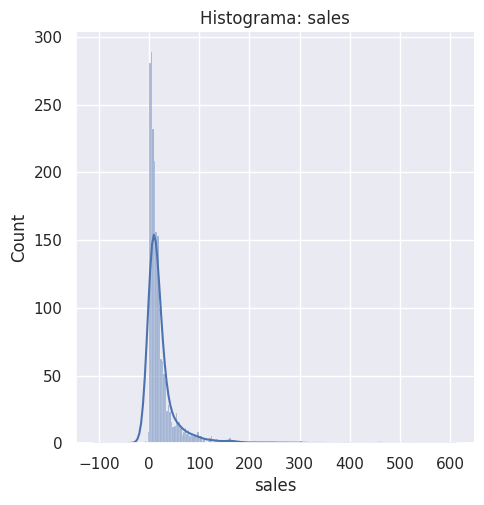

<Figure size 800x1000 with 0 Axes>

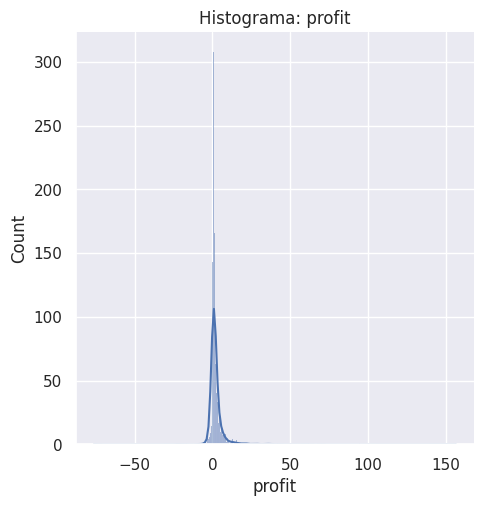

<Figure size 800x1000 with 0 Axes>

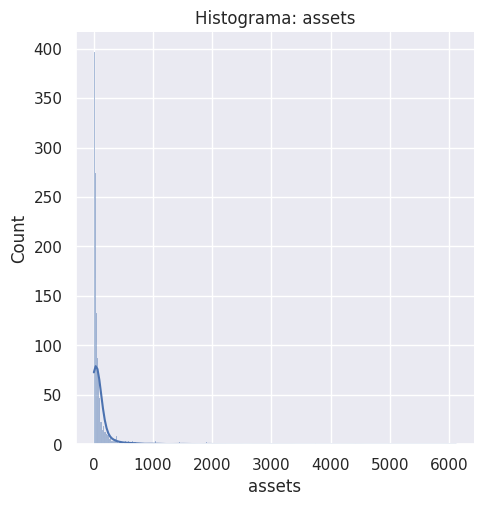

<Figure size 800x1000 with 0 Axes>

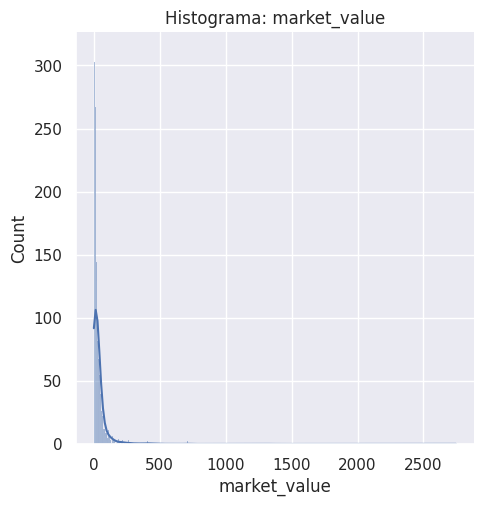

In [ ]:
# biblioteca matplot e seaborn

plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
# create distplots

#for itera sobre cada coluna numérica do DataFrame / apenas colunas numéricas sejam incluídas na análise.
for column in df_forbes.iloc[:, 4:8]:
    plt.figure()
    sns.displot(data = df_forbes , x = column, kde= True)
    plt.title("Histograma: "+column)

# sns.displot(data=forbes, x=column, kde=True): Gera um histograma para a coluna atual (column)
# do DataFrame forbes, com a densidade de kernel estimada (kde=True).
# O parâmetro x especifica a variável a ser plotada.

### Boxplot das variáveis

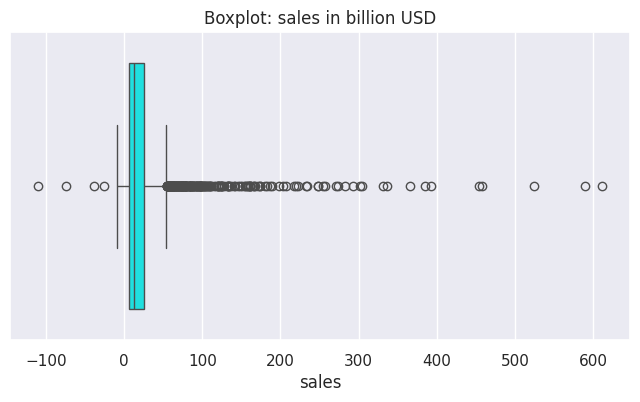

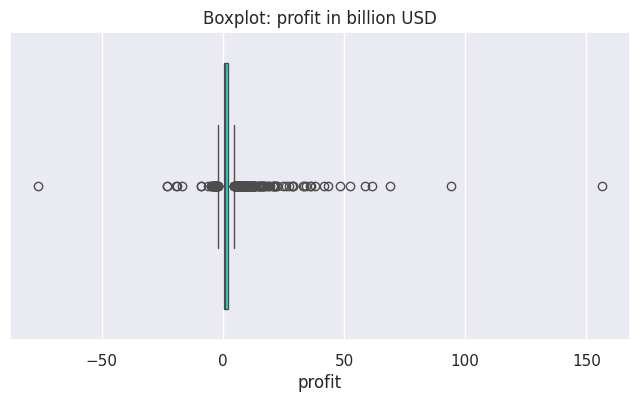

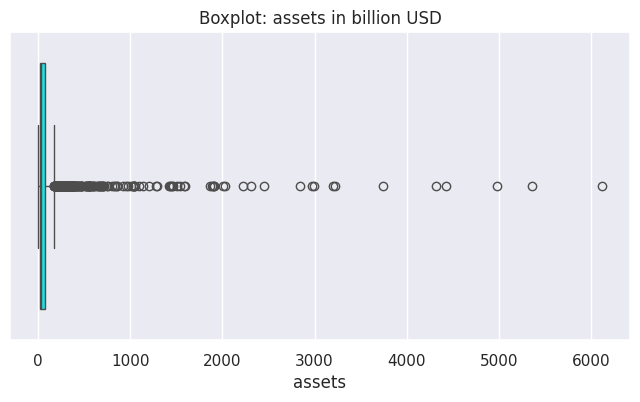

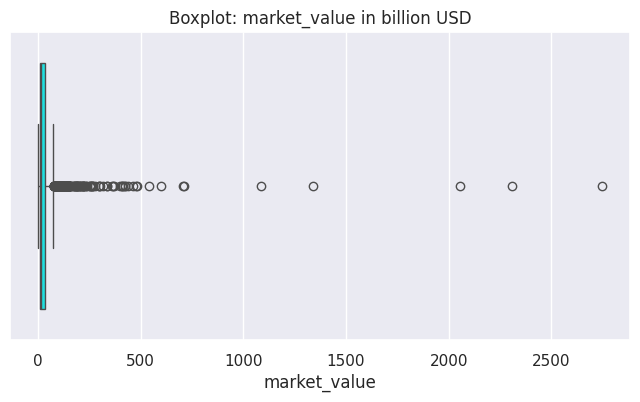

In [ ]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in colunas_numericas:
    plt.figure()
    sns.boxplot(data = df_forbes , x = column, color='cyan',showfliers=True) # indica que os valores discrepantes (outliers) devem ser exibidos no gráfico.
    plt.title("Boxplot: "+column + " in billion USD")

Nota-se a grande quantidade de outliers expressadas pelos pontinhos nos gráficos de caixa, o que dificultou bastante a visualizacao dos dados

Para fazermos os boxplots sem considerar os outliers podemos rodar a mesma funçao porém com o parametro showfliers = False, assim ficará mais facil a analise dos resultados

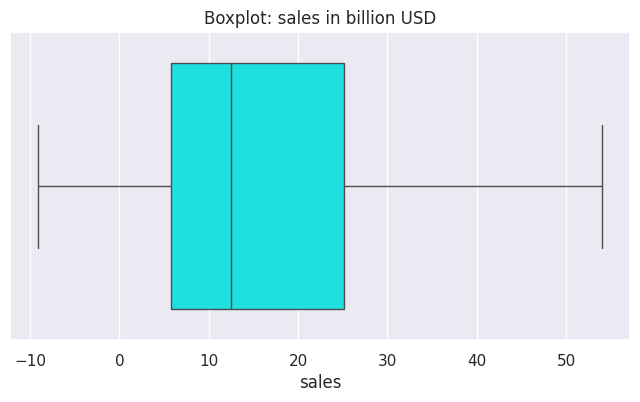

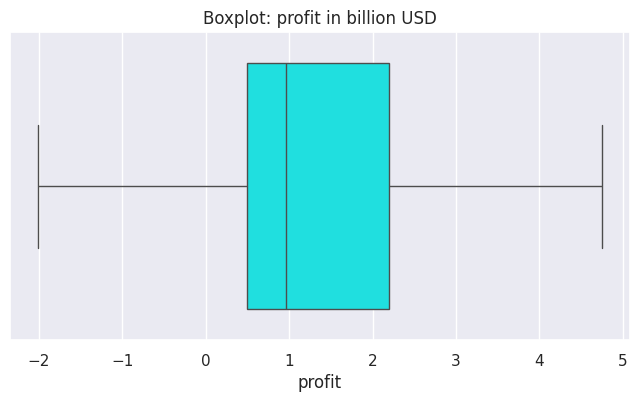

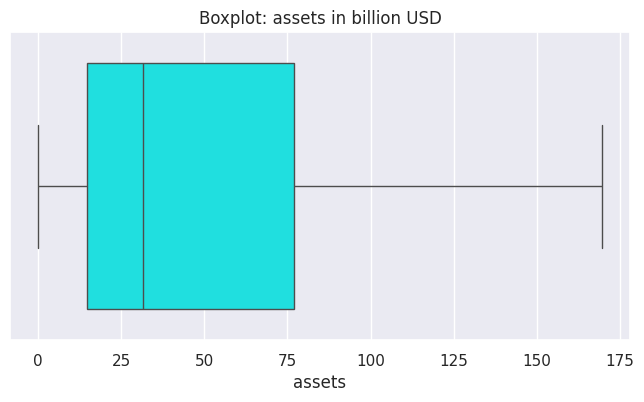

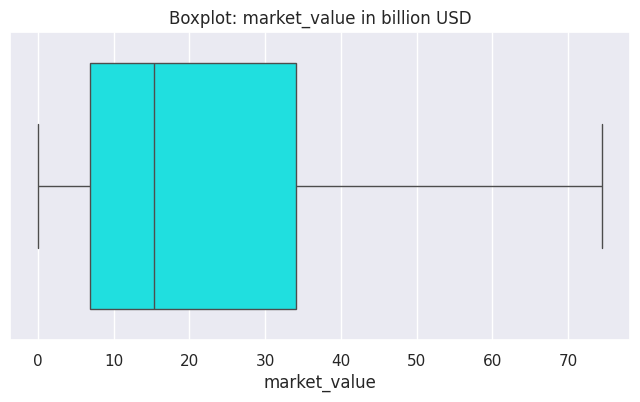

In [ ]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in df_forbes.iloc[:, 4:8]:
    plt.figure()
    sns.boxplot(data = df_forbes , x = column, color='cyan',showfliers=False) # indica que os valores discrepantes (outliers) devem ser exibidos no gráfico.
    plt.title("Boxplot: "+column + " in billion USD")

Pelos box plots podemos ver a grande concentracao de empresas com:

- Vendas proximas a 0.5 a 25 bilhoes, com valores positivos e negativos nas caldas
- Lucro oscilando 0.5 a 2 bilhoes, com valores positivos e negativos nas caldas,
- Asssets (ativos) de 20 a 75 bilhoes
- Valor de mercado proximo a 0.8 - 35 bilhoes

Vamos agora analisar os outliers encontrados!!

### Outliers das variáveis

#### 1. Metodo do Z score:
O método z-score utiliza como referencia a quantos desvios padrões a informação está da média

Se Z-score > 3 desvios padroes geralmente se pode considerar um outlier.

Essa função, `find_outlier_zscore`, calcula os outliers em um conjunto de dados especificado por meio do escore Z (Z-score). Aqui está uma explicação linha por linha:

1. `def find_outlier_zscore(dataset, threshold, colname):`: Define a função `find_outlier_zscore` que aceita três argumentos: o conjunto de dados (`dataset`), o limite do escore Z para identificar outliers (`threshold`) e o nome da coluna sobre a qual os outliers serão identificados (`colname`).

2. `df = dataset[colname]`: Seleciona a coluna específica do conjunto de dados com base no nome fornecido em `colname` e a atribui à variável `df`.

3. `outliers = []` e `zscore = []`: Inicializa duas listas vazias, uma para armazenar os valores dos outliers (`outliers`) e outra para armazenar os escores Z calculados para cada valor da coluna (`zscore`).

4. `threshold = threshold`: Atribui o valor de limite do escore Z fornecido em `threshold` à variável `threshold`.

5. `mean = np.mean(df)` e `std = np.std(df)`: Calcula a média (`mean`) e o desvio padrão (`std`) dos valores na coluna especificada.

6. `for i in df.values:`: Itera sobre cada valor na coluna `df`.

7. `z_score= (i - mean)/std`: Calcula o escore Z para cada valor da coluna usando a fórmula do escore Z: (valor - média) / desvio padrão.

8. `zscore.append(z_score)`: Adiciona o escore Z calculado à lista de escores Z.

9. `if np.abs(z_score) > threshold:`: Verifica se o valor absoluto do escore Z é maior que o limite definido em `threshold`.

10. `outliers.append(i)`: Se o valor absoluto do escore Z exceder o limite, o valor correspondente na coluna é considerado um outlier e é adicionado à lista de outliers.

11. `print("o número de outliers encontrado em {} foi de: ".format(colname),len(outliers))`: Imprime o número de outliers encontrados na coluna especificada.

12. `return zscore, outliers`: Retorna duas listas: uma lista contendo todos os escores Z calculados para os valores da coluna (`zscore`) e outra lista contendo os valores dos outliers encontrados na coluna (`outliers`).

In [ ]:
def find_outlier_zscore(dataset, threshold, colname):
  ### funcao que calcula a quantidade de outliers encontrados dado o nome do dataframe, o threshold e o nome da coluna
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
    print("o número de outliers encontrado em {} foi de: ".format(colname),len(outliers))
    return zscore, outliers

o número de outliers encontrado em sales foi de:  38
o número de outliers encontrado em profit foi de:  28
o número de outliers encontrado em assets foi de:  32
o número de outliers encontrado em market_value foi de:  19


<Figure size 1000x500 with 0 Axes>

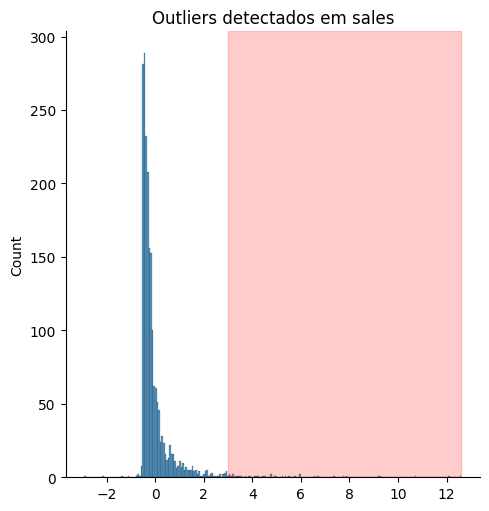

<Figure size 1000x500 with 0 Axes>

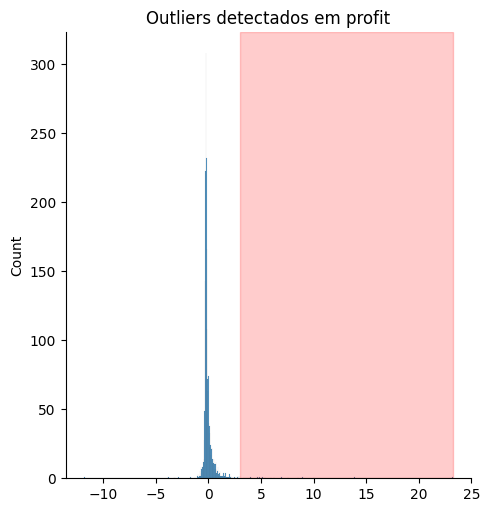

<Figure size 1000x500 with 0 Axes>

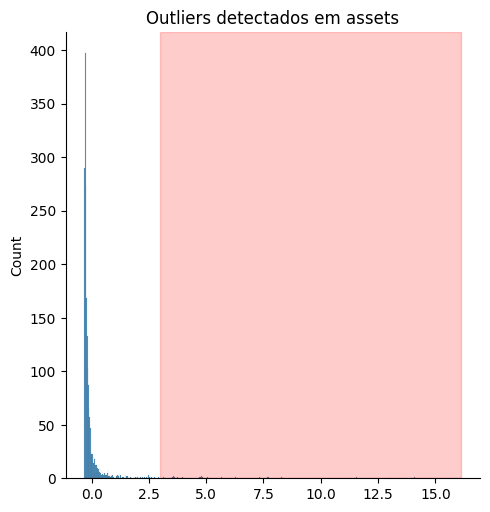

<Figure size 1000x500 with 0 Axes>

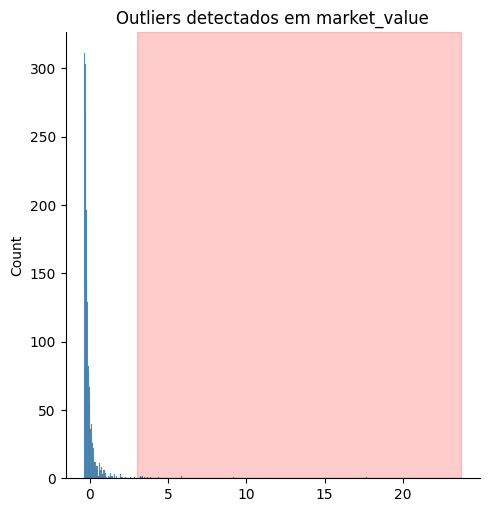

In [ ]:
for column in df_forbes.iloc[:, 4:8]:
  zscore, out =  find_outlier_zscore(df_forbes, 3, column)
  if len(out) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

#### Removendo outliers com o método z-score


1. `replace_na_outlier_zscore(dataset, threshold, colname)`: Esta função
substitui os outliers por valores nulos (NaN). Ela recebe o conjunto de dados `dataset`, um limite de outlier `threshold` e o nome da coluna `colname`. Para cada valor na coluna, calcula o escore Z, identifica os outliers com base no limite especificado e os substitui por NaN.

2. `drop_outliers(dataset, threshold)`: Esta função remove as linhas que contêm outliers. Itera sobre cada coluna numérica do conjunto de dados `dataset`, usando a função `replace_na_outlier_zscore` para substituir os outliers por NaN e, em seguida, utiliza o método `dropna()` para remover as linhas com valores nulos.

3. `replace_median_outliers(dataset, threshold)`: Esta função substitui os outliers pela mediana da respectiva coluna. Funciona de maneira semelhante à função `drop_outliers`, mas, em vez de remover as linhas, substitui os valores nulos pela mediana da coluna correspondente usando o método `fillna()`.

4. `forbes_zscore_na = drop_outliers(df_forbes, 3)`: Aplica a remoção de outliers usando o método Z-score com substituição por NaN ao DataFrame `df_forbes` e atribui o resultado ao DataFrame `forbes_zscore_na`.

5. `forbes_zscore_median = replace_median_outliers(df_forbes, 3)`: Aplica a remoção de outliers usando o método Z-score com substituição pela mediana ao DataFrame `df_forbes` e atribui o resultado ao DataFrame `forbes_zscore_median`.


In [ ]:
# substitui outliers por NaN
def replace_na_outlier_zscore(dataset, threshold, colname):
  ### funcao que faz um replace para NaN (valor nulo) caso seja encontrado um outlier
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)

    return val

##### Remove os valores nulos que substituiram os outliers

In [ ]:
def drop_outliers(dataset, threshold):
  ### vamos utilizar a funcao drop NA para remover outliers
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

In [ ]:
forbes_zscore_na = drop_outliers(df_forbes, 3)

In [ ]:
forbes_zscore_na.iloc[:,4:8].agg([np.mean, np.median, np.std])

,sales,profit,assets,market_value
mean,19.200778,1.556693,71.730201,27.075109
median,11.950000,0.918800,29.710000,14.465000
std,23.689088,2.420944,130.812364,39.365915


##### Substituindo nulos que eram outliers pela mediana

In [ ]:
def replace_median_outliers(dataset, threshold):
  ### vamos utilizar a funcao fillna para trocar os NaNs pela mediana
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset.median())

In [ ]:
forbes_zscore_median = replace_median_outliers(df_forbes, 3)


<ipython-input-44-94f27928ef37>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataset.fillna(dataset.median())


In [ ]:
forbes_zscore_median.iloc[:,4:8].agg([np.mean,np.median,np.std])

,sales,profit,assets,market_value
mean,20.317681,1.778652,76.016298,28.926544
median,12.240000,0.950500,31.065000,15.140000
std,25.388661,2.892557,136.012173,42.077164


#### 2. Metodo do IQR :
O método IQR (distância inter-quartil em inglês) ve a distancia da amplitude dos quartis:

- A função `find_outlier_iqr(dataset, colname)` calcula os outliers com base no intervalo interquartil (IQR) para uma determinada coluna do conjunto de dados. Recebe o conjunto de dados `dataset` e o nome da coluna `colname`.
- `q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)`: Calcula os quartis Q1 (25º percentil) e Q3 (75º percentil) da coluna.
- `iqr = q75 - q25`: Calcula o intervalo interquartil (IQR) subtraindo Q1 de Q3.
- `cut_off = iqr * 1.5`: Calcula o limite para identificar outliers, que é 1.5 vezes o IQR.
- `lower, upper = q25 - cut_off, q75 + cut_off`: Calcula as margens inferior (lower) e superior (upper) para identificar outliers.
- Um loop é iterado sobre os valores da coluna, e os valores que estão fora das margens inferior e superior são considerados outliers e adicionados à lista `outliers`.
- Finalmente, a função imprime o valor de IQR e o número de outliers encontrados, e retorna as margens inferior e superior e a lista de outliers.

- O loop `for column in df_forbes.select_dtypes(include=np.number).columns:` itera sobre todas as colunas numéricas do DataFrame `df_forbes`.
- Para cada coluna, a função `find_outlier_iqr()` é chamada para calcular os outliers.
- Se outliers são encontrados na coluna, um gráfico de distribuição é plotado usando `sns.displot()` com uma marcação visual para destacar a presença de outliers nas margens inferior e superior.


In [ ]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print('IQR é ', round(iqr,2))
    #print('Valor minimo', lower)
    #print('Valor maximo', upper)

    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print(f'O numero de outliers encontrado em {column} foi de', len(outliers))
    return lower, upper, outliers

IQR é  19.4
O numero de outliers encontrado em sales foi de 219
IQR é  1.71
O numero de outliers encontrado em profit foi de 252
IQR é  62.25
O numero de outliers encontrado em assets foi de 238
IQR é  27.18
O numero de outliers encontrado em market_value foi de 185


<Figure size 1000x600 with 0 Axes>

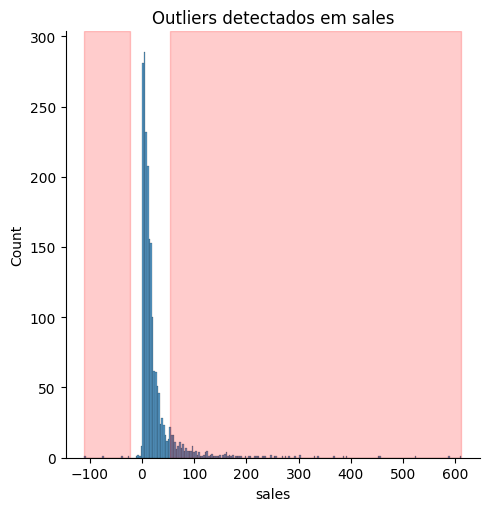

<Figure size 1000x600 with 0 Axes>

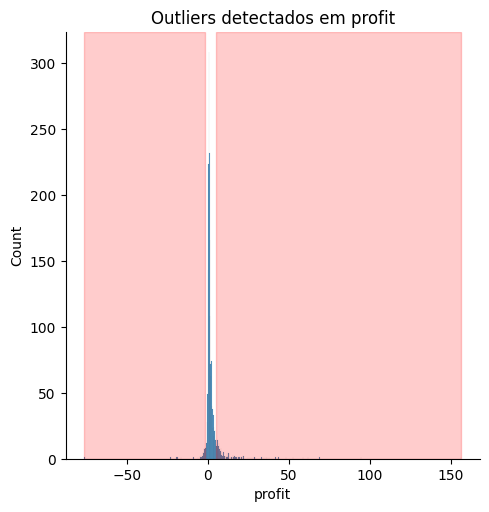

<Figure size 1000x600 with 0 Axes>

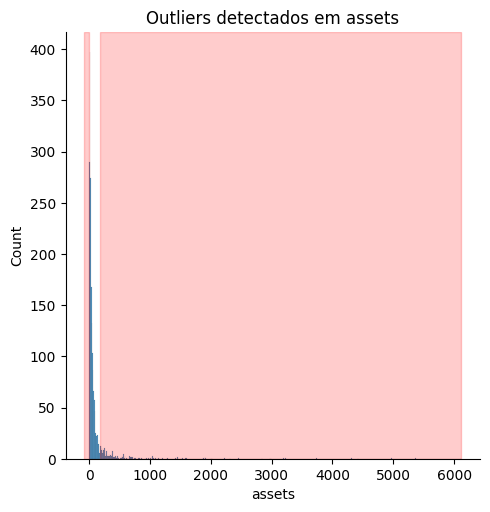

<Figure size 1000x600 with 0 Axes>

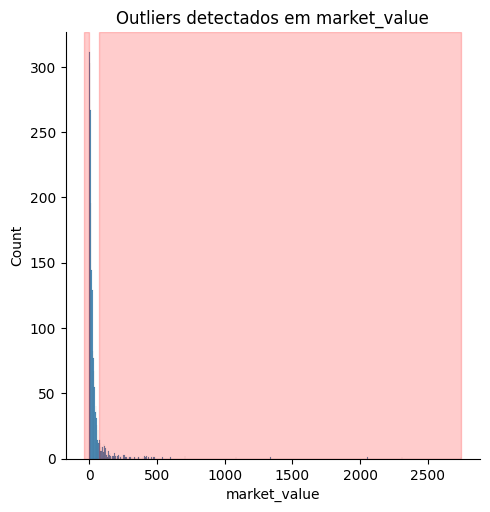

In [ ]:
for column in df_forbes.iloc[:,4:8]:
  lower, upper, out =  find_outlier_iqr(df_forbes, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(df_forbes[column], kde=False)
    plt.axvspan(xmin = lower,xmax= df_forbes[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df_forbes[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

#### Manipulando outlier via iqr


In [ ]:
def replace_outliers_na_iqr(dataset, colname, threshold):
    df = dataset[colname]
    threshold = threshold
    q25, q75 = df.quantile(0.25), df.quantile(0.75)
    IQR = q75 - q25
    cut_off = threshold * IQR
    lower, upper = q25 - cut_off, q75 + cut_off

    for i in range(len(df)):
        if df.iloc[i] > upper or df.iloc[i] < lower:
            dataset.at[i, colname] = np.nan

In [ ]:
def replace_outliers_and_drop_na(dataset, threshold):
    for column in dataset.select_dtypes(include=np.number).columns:
        replace_outliers_na_iqr(dataset, column, threshold)
    return dataset.dropna()

In [ ]:
# Aplicar a substituição de outliers e a remoção de linhas com valores nulos no DataFrame df_forbes
forbes_iqr_nan = replace_outliers_and_drop_na(df_forbes, 1.5)

In [ ]:
forbes_iqr_nan

,rank,name,country,industry,sales,profit,assets,market_value
221,222,Travelers,United States,Insurance,37.790,2.7800,108.90,42.11
246,247,Takeda Pharmaceutical,Japan,Drugs and Biotechnology,29.990,2.0900,102.35,52.78
252,253,Kraft Heinz Company,United States,"Food, Soft Beverages, Alcohol and Tobacco",26.930,2.4200,90.94,50.71
278,279,SK Hynix,South Korea,"IT, Internet, Software and Services",34.530,1.7300,82.14,46.11
305,306,Exelon,United States,"Engineer, Manufacturing and Construction",19.310,2.2400,96.92,42.62
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.350,0.4895,7.82,15.60
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.620,-0.2020,11.39,3.17
1997,1998,Yes Bank,India,Banking and Financial Service,3.340,0.0916,43.22,5.60
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,0.556,0.1671,42.97,2.49


In [ ]:
forbes_iqr_nan.iloc[:,4:8].agg([np.mean, np.median, np.std])

,sales,profit,assets,market_value
mean,12.479493,0.970596,34.738500,17.031167
median,9.620000,0.792000,22.915000,12.240000
std,10.518424,0.969573,32.902978,15.080193


In [ ]:
def replace_outliers_median_iqr(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    replace_outliers_na_iqr(dataset, column, threshold)
  return dataset.fillna(dataset.median())

In [ ]:
forbes_iqr_median = replace_outliers_median_iqr(df_forbes, 1.5)

<ipython-input-185-f30c93f3cb19>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataset.fillna(dataset.median())


In [ ]:
forbes_iqr_median

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,10.840,0.85645,26.62,13.57
1,2,Saudi Aramco,Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",10.840,0.85645,26.62,13.57
2,3,ICBC,China,Banking and Financial Service,10.840,0.85645,26.62,13.57
3,4,China Construction Bank,China,Banking and Financial Service,10.840,0.85645,26.62,13.57
4,5,Agricultural Bank of China,China,Banking and Financial Service,10.840,0.85645,26.62,13.57
...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,"Engineer, Manufacturing and Construction",5.350,0.48950,7.82,15.60
1996,1997,Gap,United States,"Clothing, Shoes, Accessories, Sports Equipment",15.620,-0.20200,11.39,3.17
1997,1998,Yes Bank,India,Banking and Financial Service,3.340,0.09160,43.22,5.60
1998,1999,BEKB-BCBE,Switzerland,Banking and Financial Service,0.556,0.16710,42.97,2.49


In [ ]:
forbes_iqr_median.iloc[:,4:8].agg([np.mean, np.median, np.std])

,sales,profit,assets,market_value
mean,13.671956,1.111498,38.008628,18.274124
median,10.840000,0.856450,26.620000,13.570000
std,11.037105,1.073810,33.950017,15.682029


## Perguntas

#### Top 10 Países com mais empresas

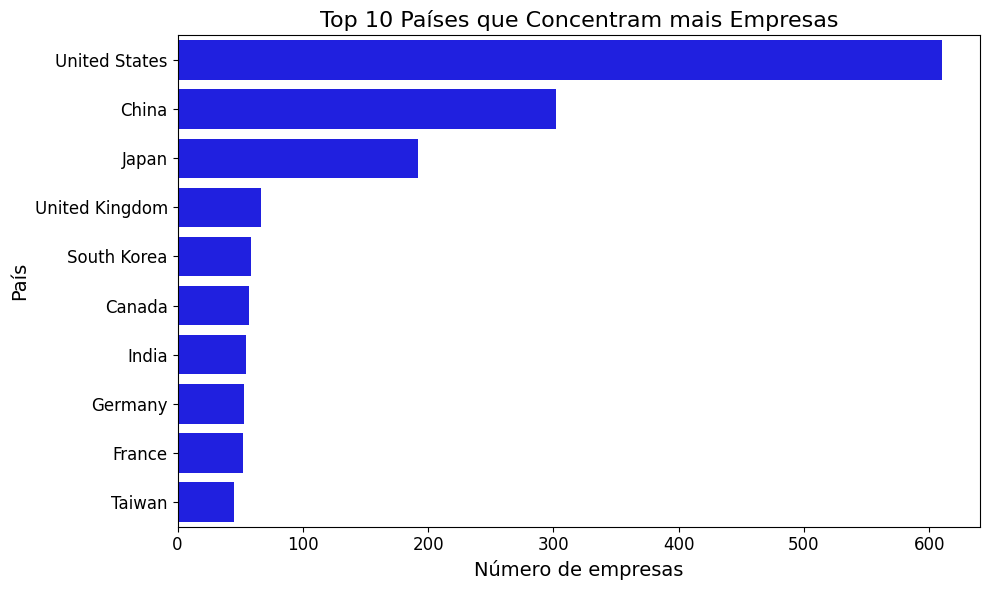

In [ ]:
# distribuição de empresas por país
qntd_empresas = df_forbes['country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=qntd_empresas.index, x=qntd_empresas.values, color='b')
plt.title('Top 10 Países que Concentram mais Empresas', fontsize=16)
plt.xlabel('Número de empresas', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#### Top 10 setores com mais empresas

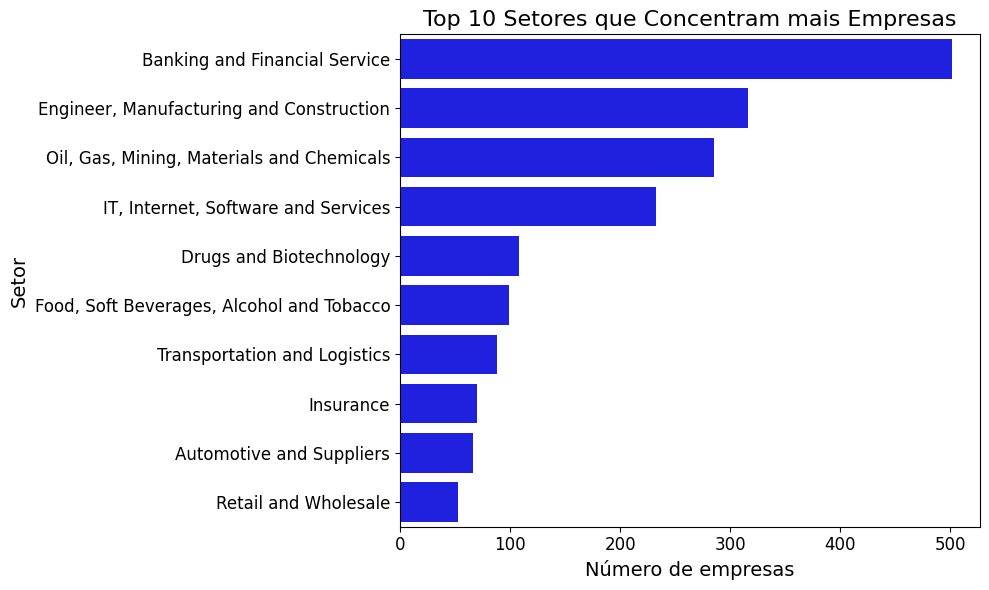

In [ ]:
# distribuição de empresas por stores
qntd_empresas_setor = df_forbes['industry'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=qntd_empresas_setor.index, x=qntd_empresas_setor.values, color='b')
plt.title('Top 10 Setores que Concentram mais Empresas', fontsize=16)
plt.xlabel('Número de empresas', fontsize=14)
plt.ylabel('Setor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#### Top 10 Empresas por categoria

In [ ]:
columns_values = df_forbes.iloc[:, 4:8]

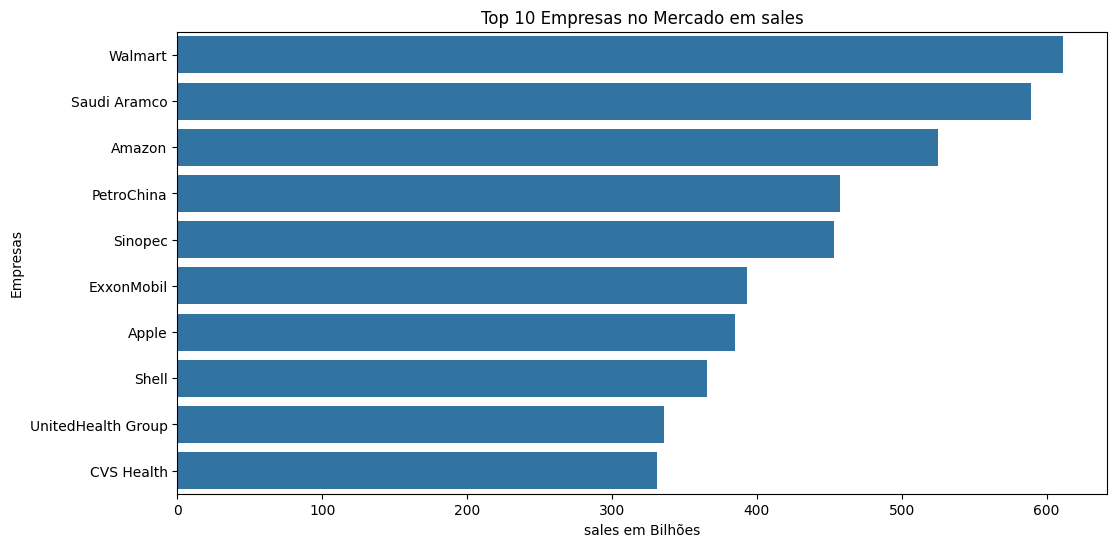

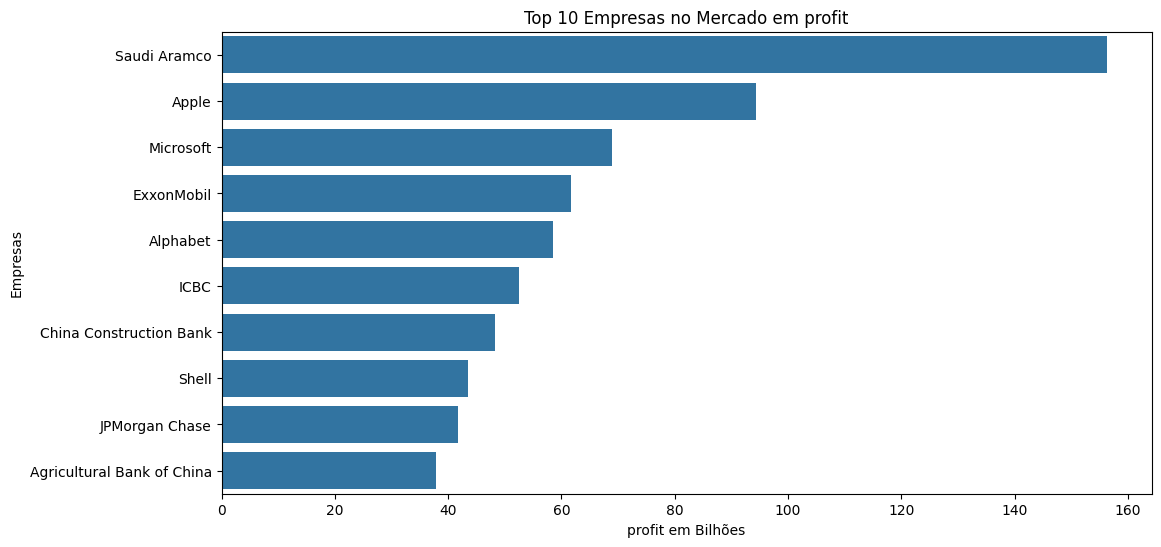

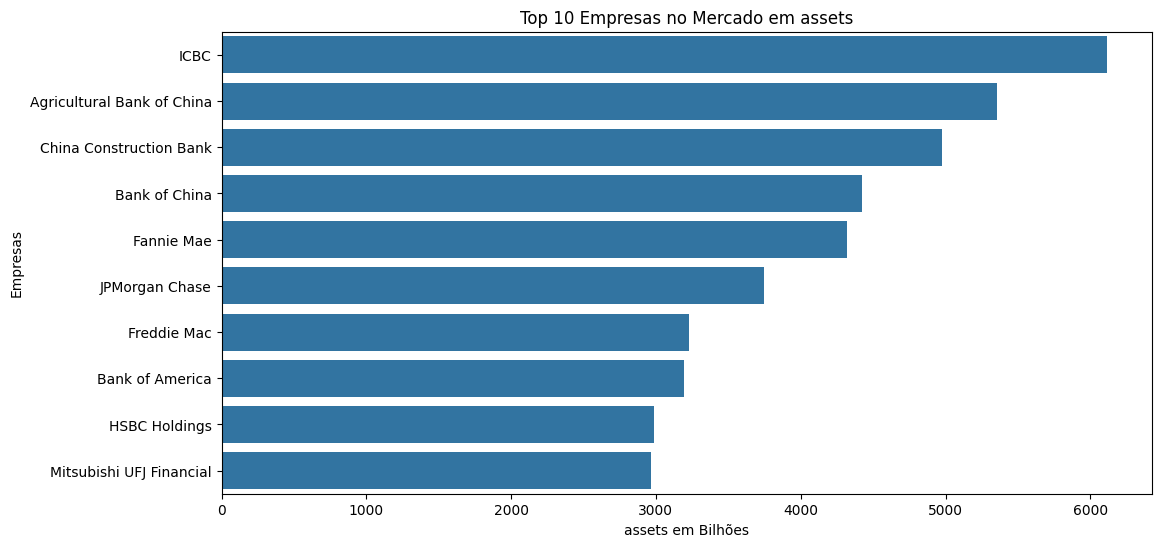

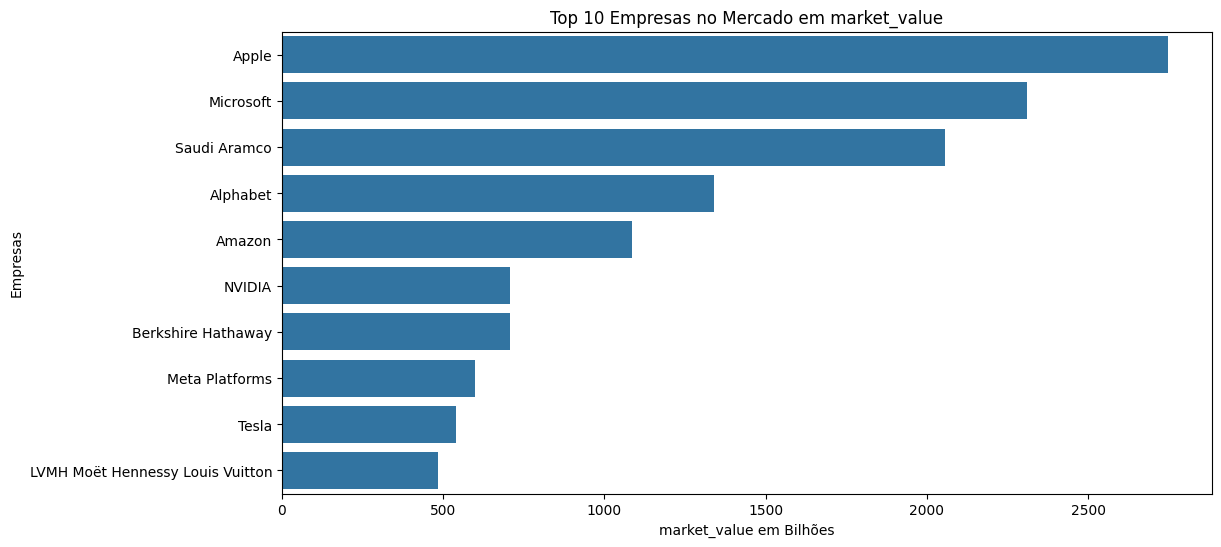

In [ ]:
#Top companies por categoria
for column in columns_values:
  plt.figure(figsize=(12,6))
  sns.barplot(x=column, y='name', data=df_forbes.sort_values(by=column,ascending=False).head(10))
  plt.xticks()
  plt.yticks()
  plt.title(f"Top 10 Empresas no Mercado em {column}")
  plt.xlabel(f'{column} em Bilhões')
  plt.ylabel('Empresas')
  plt.show()

#### Quantidade de empresas dentre os 3 países e os 5 setores predominantes

Dentre 58 paises, 3 concentram as empresas mais valiosas. Estados Unidos(610), China (302), Japão (192), Juntos eles somam 1104 empresas mais de 50% das empresas ranckeadas.

Dentre os 24 setores, podemos considerar que o setor de serviços financeiros, industria, exploração de recursos naturais , tecnologia e farmacos são os setores que mais empresas bem avaliadas. Somando 1444 empresas, ou seja,cerca de 72%

In [ ]:
# Filtrar o DataFrame para incluir apenas os países desejados
paises_desejados = ['United States', 'China', 'Japan']
df_paises = df_forbes[df_forbes['country'].isin(paises_desejados)]

# Definir os setores desejados
setores_desejados = ['Banking and Financial Service',
                     'Engineer, Manufacturing and Construction',
                     'Oil, Gas, Mining, Materials and Chemicals',
                     'IT, Internet, Software and Services',
                     'Drugs and Biotechnology']

# Filtrar o DataFrame para incluir apenas os países e setores desejados
df_filtrado = df_forbes[df_forbes['country'].isin(paises_desejados) &
                        df_forbes['industry'].isin(setores_desejados)]

# Agrupar os dados por país e setor e contar o número de empresas em cada grupo
df_agrupado = df_filtrado.groupby(['country', 'industry']).size().unstack(fill_value=0)



In [ ]:
df_filtrado.groupby(['country', 'industry']).size().unstack(fill_value=0)

industry,Banking and Financial Service,Drugs and Biotechnology,"Engineer, Manufacturing and Construction","IT, Internet, Software and Services","Oil, Gas, Mining, Materials and Chemicals"
country,,,,,
China,74,16,78,30,39
Japan,50,11,34,28,17
United States,112,51,85,101,80


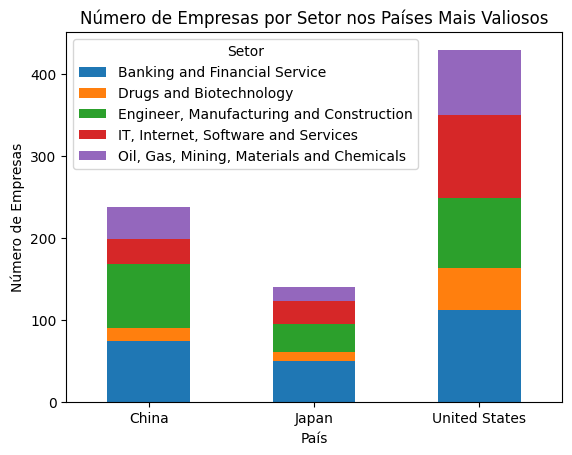

In [ ]:
# Plotar o gráfico de barras

df_agrupado.plot(kind='bar', stacked=True)
plt.title('Número de Empresas por Setor nos Países Mais Valiosos')
plt.xlabel('País')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=0)
plt.legend(title='Setor')
plt.show()

### Empresas que estão presentes no top 100 das 4 categorias

In [ ]:
# Selecionar as 50 principais empresas para cada métrica
top100_sales = df_forbes.nlargest(100, 'sales')[['rank','name']]
top100_profit = df_forbes.nlargest(100, 'profit')[['rank','name']]
top100_assets = df_forbes.nlargest(100, 'assets')[['rank','name']]
top100_market_value = df_forbes.nlargest(100, 'market_value')[['rank','name']]

In [ ]:
# Combina todas as listas de empresas selecionadas
combined_list = top100_sales.append([top100_profit, top100_assets, top100_market_value])

<ipython-input-27-05e60749c2b0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_list = top100_sales.append([top100_profit, top100_assets, top100_market_value])


In [ ]:
# Contar quantas vezes cada empresa aparece na lista combinada
overlap_count = combined_list.value_counts()


In [ ]:
# Exibir empresas que estão presentes no top 100 de todas as quatro métricas
top_companies = overlap_count[overlap_count == 4].reset_index()


In [ ]:
# empresas que estão entre as maiores 100 empresas em todas as categorias
df_forbes_top =  df_forbes[df_forbes['name'].isin(top_companies['name'])]
df_forbes_top

,rank,name,country,industry,sales,profit,assets,market_value
0,1,JPMorgan Chase,United States,Banking and Financial Service,179.93,41.80,3744.30,399.59
1,2,Saudi Aramco,Saudi Arabia,"Oil, Gas, Mining, Materials and Chemicals",589.47,156.36,660.99,2055.22
2,3,ICBC,China,Banking and Financial Service,216.77,52.47,6116.82,203.01
3,4,China Construction Bank,China,Banking and Financial Service,203.08,48.25,4977.48,172.99
4,5,Agricultural Bank of China,China,Banking and Financial Service,186.14,37.92,5356.86,141.82
5,6,Bank of America,United States,Banking and Financial Service,133.84,28.62,3194.66,220.82
10,11,Shell,United Kingdom,"Oil, Gas, Mining, Materials and Chemicals",365.89,43.51,429.15,205.45
11,12,Bank of China,China,Banking and Financial Service,158.23,33.23,4421.76,122.67
12,13,Toyota Motor,Japan,Automotive and Suppliers,270.49,18.50,542.50,188.20
15,16,Ping An Insurance Group,China,Insurance,166.37,12.64,1598.49,138.56


In [ ]:
df_forbes_top[['sales', 'profit', 'assets', 'market_value']].agg([np.mean,np.median])

,sales,profit,assets,market_value
mean,234.467273,44.345455,2993.582727,362.79
median,186.140000,37.920000,3194.660000,188.20


In [ ]:
df_forbes[['sales', 'profit', 'assets', 'market_value']].agg([np.mean,np.median])

,sales,profit,assets,market_value
mean,25.422386,2.208306,115.846347,36.99562
median,12.500000,0.961300,31.655000,15.31000


In [ ]:
df_forbes.nlargest(10,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-70-c805da805da6>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nlargest(10,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,22.1,444.788,42.855,369.014,772.748
median,17.0,423.360,21.440,350.765,424.255


In [ ]:
df_forbes.nlargest(50,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-71-05fb533484da>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nlargest(50,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,97.34,250.9354,21.69786,759.0032,321.5726
median,52.50,212.1800,13.14000,273.8200,109.2050


In [ ]:
df_forbes.nlargest(100,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-72-7b6edde7fbfe>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nlargest(100,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,134.8,181.4548,14.960221,642.5644,210.96301
median,67.5,144.0850,8.375000,231.8300,73.86000


In [ ]:
df_forbes.nsmallest(100,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-73-ba26a2fb8f54>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nsmallest(100,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,1664.95,-1.79658,-0.259443,72.07415,9.8729
median,1745.50,1.06500,0.221650,40.84000,5.7250


In [ ]:
df_forbes.nsmallest(50,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-74-1b03a27b9452>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nsmallest(50,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,1665.08,-4.96036,-0.955342,101.7919,8.57358
median,1755.00,0.64650,0.169600,48.7400,4.52000


In [ ]:
df_forbes.nsmallest(10,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])

<ipython-input-75-e543da64cc80>:1: FutureWarning: ['name', 'country', 'industry', 'bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_forbes.nsmallest(10,['sales', 'profit', 'assets', 'market_value']).agg([np.mean,np.median])


,rank,sales,profit,assets,market_value
mean,1314.2,-27.7346,-6.89541,299.5805,10.8189
median,1432.0,-8.3350,0.35725,205.7050,7.5200


In [ ]:
plot_forbes_top4 = df_forbes_top.groupby(['country', 'industry']).size().unstack(fill_value=0)


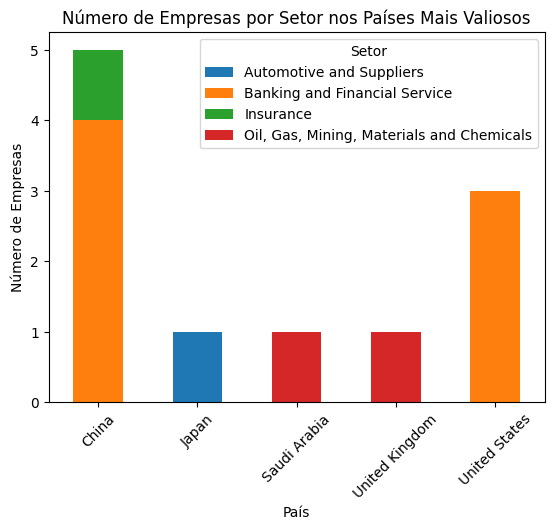

In [ ]:
plot_forbes_top4.plot(kind='bar', stacked=True)
plt.title('Número de Empresas por Setor nos Países Mais Valiosos')
plt.xlabel('País')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45)
plt.legend(title='Setor')
plt.show()

### Correlação entre métricas

#### mapa de calor

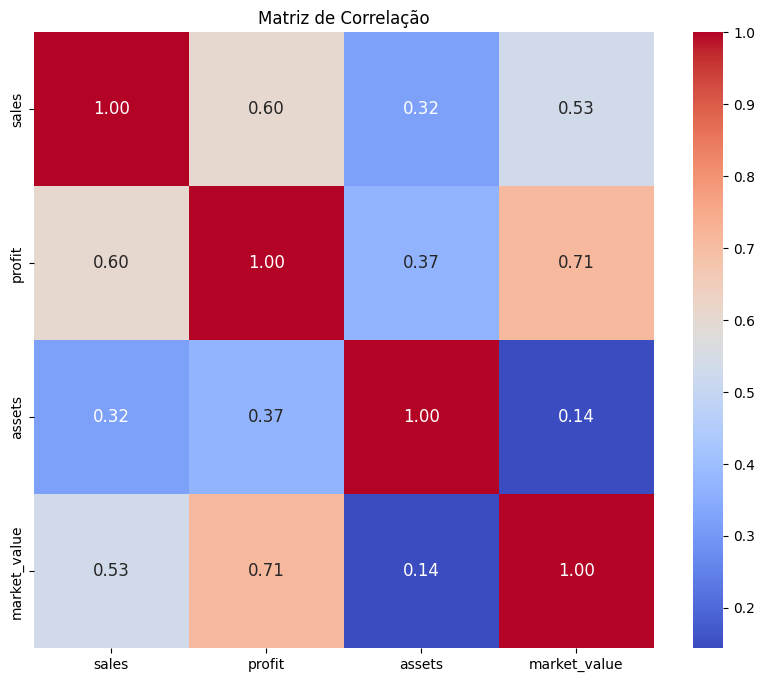

In [ ]:
# Calcular as correlações entre as métricas
correlation_matrix = df_forbes[['sales', 'profit', 'assets', 'market_value']].corr()

# Visualizar as correlações usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Matriz de Correlação')
plt.show()

Quanto mais próxima a correlação for de 1 ou -1, mais forte será a relação entre as métricas. Se a correlação for próxima de 0, não há uma relação linear forte entre as métricas.

#### mapa de dispersão

In [ ]:
columns_scatter = df_forbes[['sales', 'profit', 'assets']]

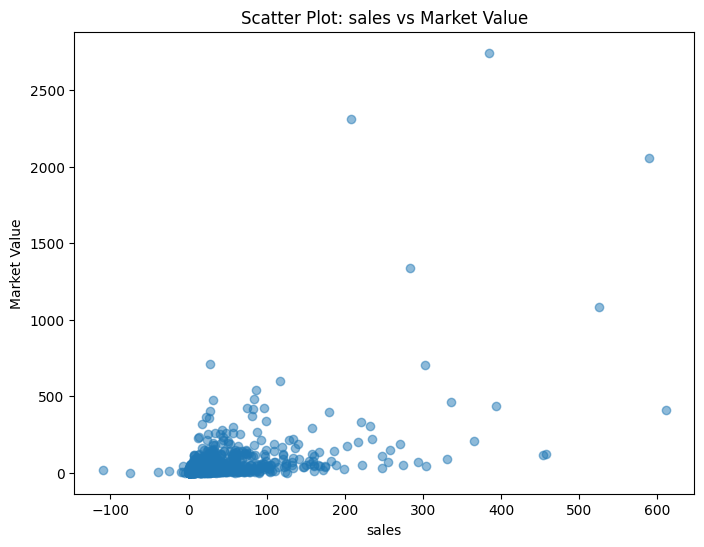

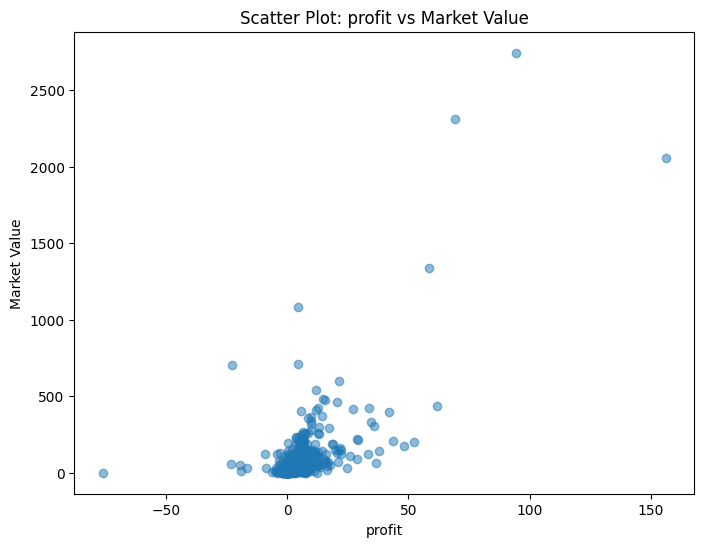

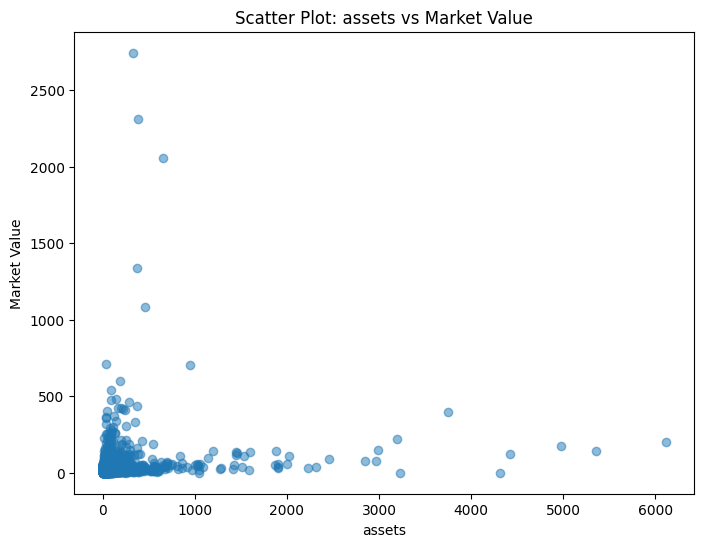

In [ ]:
for column in columns_scatter:
  plt.figure(figsize=(8, 6))
  plt.scatter(columns_scatter[column], df_forbes['market_value'], alpha=0.5)
  plt.xlabel(f'{column}')
  plt.ylabel('Market Value')
  plt.title(f'Scatter Plot: {column} vs Market Value')
  plt.show()

### Análise por indicadores:

Qual a média, mediana e desvio padrão das variáveis 'sales', 'profit', 'assets' e 'market_value'?

In [ ]:
df_forbes['market_value'].describe()

count    2000.000000
mean       36.995620
std       114.230626
min         0.032000
25%         6.860000
50%        15.310000
75%        34.042500
max      2746.210000
Name: market_value, dtype: float64

In [ ]:
df_forbes.iloc[:, 4:8].agg([np.mean, np.median, np.std])

,sales,profit,assets,market_value
mean,25.422386,2.208306,115.846347,36.995620
median,12.500000,0.961300,31.655000,15.310000
std,46.517169,6.632031,372.242230,114.230626


Qual a distribuição das empresas por faixa de valor de mercado?

In [ ]:
min_value = df_forbes['market_value'].min()
min_value

0.032

In [ ]:
# Valores mínimos e máximos
min_value = df_forbes['market_value'].min()
max_value = df_forbes['market_value'].max()

# Número de faixas desejadas (ou bins)
num_bins = 10  # Por exemplo, dividindo em 10 faixas
bin_size = (max_value - min_value) / num_bins

# Criando os limites das faixas de valores
bin_edges = [min_value + i * bin_size for i in range(num_bins)]

df_forbes['bin'] = pd.cut(df_forbes['market_value'], bins=bin_edges, include_lowest=True)

# Contando a quantidade de observações em cada faixa
bin_counts = df_forbes['bin'].value_counts().sort_index()

# Exibindo as faixas de valores e suas contagens
for i, (bin_interval, count) in enumerate(bin_counts.items(), start=1):
    print(f"Faixa {i}: {bin_interval}, Quantidade: {count}")

Faixa 1: (0.031, 274.65], Quantidade: 1971
Faixa 2: (274.65, 549.268], Quantidade: 21
Faixa 3: (549.268, 823.885], Quantidade: 3
Faixa 4: (823.885, 1098.503], Quantidade: 1
Faixa 5: (1098.503, 1373.121], Quantidade: 1
Faixa 6: (1373.121, 1647.739], Quantidade: 0
Faixa 7: (1647.739, 1922.357], Quantidade: 0
Faixa 8: (1922.357, 2196.974], Quantidade: 1
Faixa 9: (2196.974, 2471.592], Quantidade: 1


In [ ]:
# Definindo os limites dos intervalos em bilhões de dólares
intervalos = {
    'Menor 1 (Bilhão)': (0, 1),
    'De 1 a 99 (Bilhões)': (1, 99),
    'De 100 a 500 (Bilhões)': (100, 500),
    'De 500 a 1000 (Bilhões)': (500, 1000),
    'Maior que 1000 (Bilhões)': (1000, float('inf'))  # 'inf' representa infinito
}

# Contagem de empresas em cada intervalo
contagem_intervalos = {intervalo: ((df_forbes['market_value'] >= limite_inf) & (df_forbes['market_value'] < limite_sup)).sum()
                       for intervalo, (limite_inf, limite_sup) in intervalos.items()}

# Exibindo a contagem de empresas em cada intervalo
for intervalo, contagem in contagem_intervalos.items():
    print(f"{intervalo}: {contagem}")

Menor 1 (Bilhão): 44
De 1 a 99 (Bilhões): 1824
De 100 a 500 (Bilhões): 122
De 500 a 1000 (Bilhões): 4
Maior que 1000 (Bilhões): 5


In [ ]:
# Definindo os limites dos intervalos em bilhões de dólares
intervalos = {
    'Menor que 1 (Bilhão)': (0, 1),
    'De 1 a 9 (Bilhões)': (1, 10),
    'De 10 a 50 (Bilhões)': (10, 50),
    'De 50 a 100 (Bilhões)': (50, 100),
    'De 100 a 500 (Bilhões)': (100, 500),
    'De 500 a 1000 (Bilhões)': (500, 1000),
    'Maior que 1000 (Bilhões)': (1000, float('inf'))  # 'inf' representa infinito
}

# Contagem de empresas em cada intervalo
contagem_intervalos = {intervalo: ((df_forbes['market_value'] >= limite_inf) & (df_forbes['market_value'] < limite_sup)).sum()
                       for intervalo, (limite_inf, limite_sup) in intervalos.items()}

# Exibindo a contagem de empresas em cada intervalo
for intervalo, contagem in contagem_intervalos.items():
    print(f"{intervalo}: {contagem}")

Menor que 1 (Bilhão): 44
De 1 a 9 (Bilhões): 665
De 10 a 50 (Bilhões): 983
De 50 a 100 (Bilhões): 177
De 100 a 500 (Bilhões): 122
De 500 a 1000 (Bilhões): 4
Maior que 1000 (Bilhões): 5


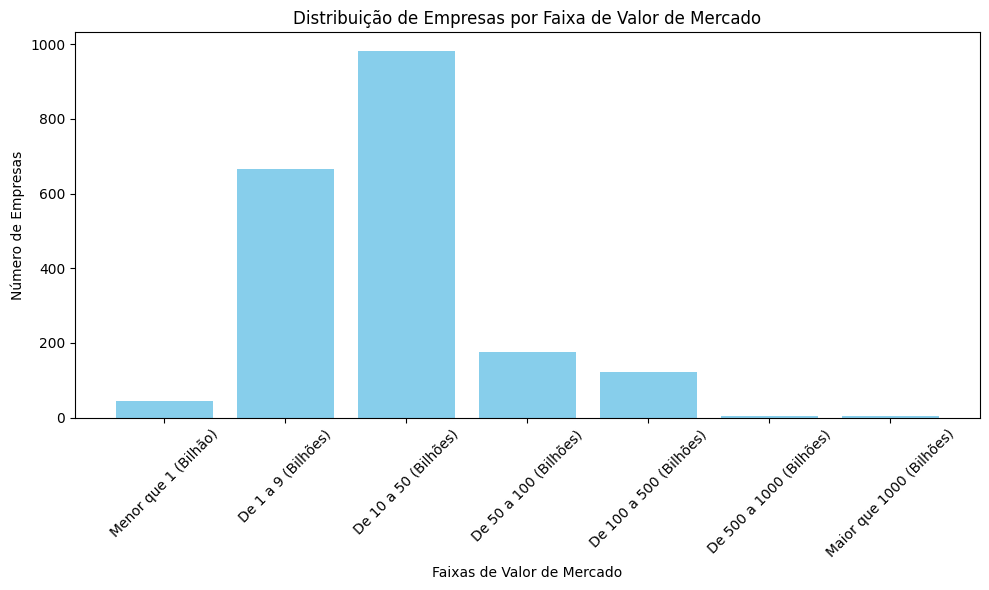

In [ ]:
# Dados da distribuição
intervalos = [
    'Menor que 1 (Bilhão)',
    'De 1 a 9 (Bilhões)',
    'De 10 a 50 (Bilhões)',
    'De 50 a 100 (Bilhões)',
    'De 100 a 500 (Bilhões)',
    'De 500 a 1000 (Bilhões)',
    'Maior que 1000 (Bilhões)'
]
contagens = [contagem_intervalos[intervalo] for intervalo in intervalos]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervalos, contagens, color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Faixas de Valor de Mercado')
plt.ylabel('Número de Empresas')
plt.title('Distribuição de Empresas por Faixa de Valor de Mercado')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Quais indicadores são mais relevantes para explicar o valor de mercado das empresas?

Análise temporal

Como o valor de mercado das empresas se comportou ao longo do tempo?
Existem fatores macroeconômicos que influenciam o valor de mercado das empresas?
Como a pandemia de COVID-19 impactou o valor de mercado das empresas?



### Outras análises

É possível identificar grupos de empresas com características semelhantes?


Quais são os principais desafios e oportunidades para as empresas no futuro?


Como as empresas podem aumentar seu valor de mercado?

Quais empresas apresentaram o maior crescimento em valor de mercado?